#Code for estimating distance between people:
First mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import necessary packages

In [2]:
! pip install numpy
! pip install opencv-python
! pip install tensorflow
! pip install keras
! pip install ultralytics
! pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 6.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

create the CrowdDataset class

Tutorial: https://blog.roboflow.com/estimate-speed-computer-vision/

Choose the four points to perform perspective transformation:

In [4]:
import cv2
import numpy as np
# # Convert the image to grayscale
# gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

def plot_corners(image, corners):
  image = cv2.resize(image, (800, 600))

  # Create a plot to draw the image and corners
  corners = np.intp(corners)
  plt.figure()

  fig, ax = plt.subplots()

  # Draw detected corners on the original image
  for corner in corners:
      x, y = corner.ravel()
      circle = plt.Circle((x, y), 5, color='r')
      ax.add_patch(circle)

  # Display the image with detected corners
  ax.imshow(image)
  plt.show()

# Convert the bounding box coordinates to NumPy array for easier manipulation
# top right, bottom right, bottom left, top left

#set the four points
points = [[800, 250],[1280,500], [600, 720], [150,350]]
corner_points_arr = np.float32(points[:4])

# image_np = cv2.imread("/content/drive/MyDrive/data/sompt22/test/SOMPT22-03/img1/000001.jpg")
# plot_corners(image_np, points)


Run the pipeline:

The outputs of the pipline are the following


1.   ax1 - image of the annotated frame
2.   ax2 - image of the bird's eyeview
3.   label_df - panda dataframe with statistics of crowd density, speed, count, area of the square boundary for each subgroup seen in the frame




0: 384x640 10 persons, 653.9ms
Speed: 2.7ms preprocess, 653.9ms inference, 9.9ms postprocess per image at shape (1, 3, 384, 640)
(170.24023, 109.21997, 108.2561, 83.3811, 83.3042, 95.1615, 83.496704, 87.26495, 68.38434, 79.54608)


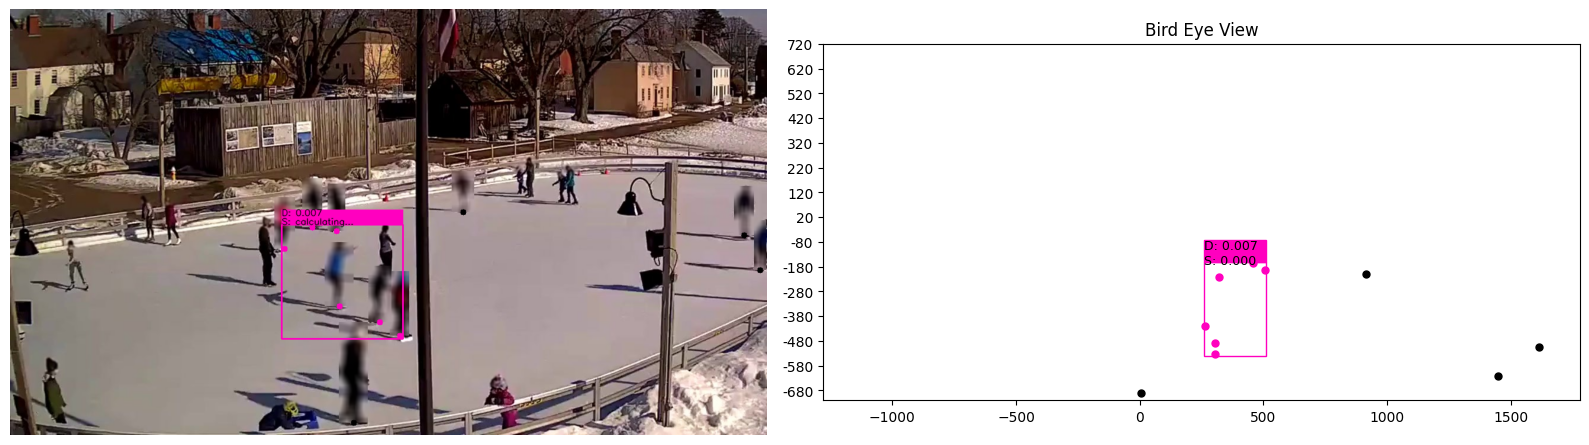


0: 384x640 10 persons, 252.0ms
Speed: 3.5ms preprocess, 252.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
(169.85913, 109.20108, 108.47244, 82.6712, 84.234406, 95.23038, 76.06705, 88.922516, 66.06766, 79.54175)


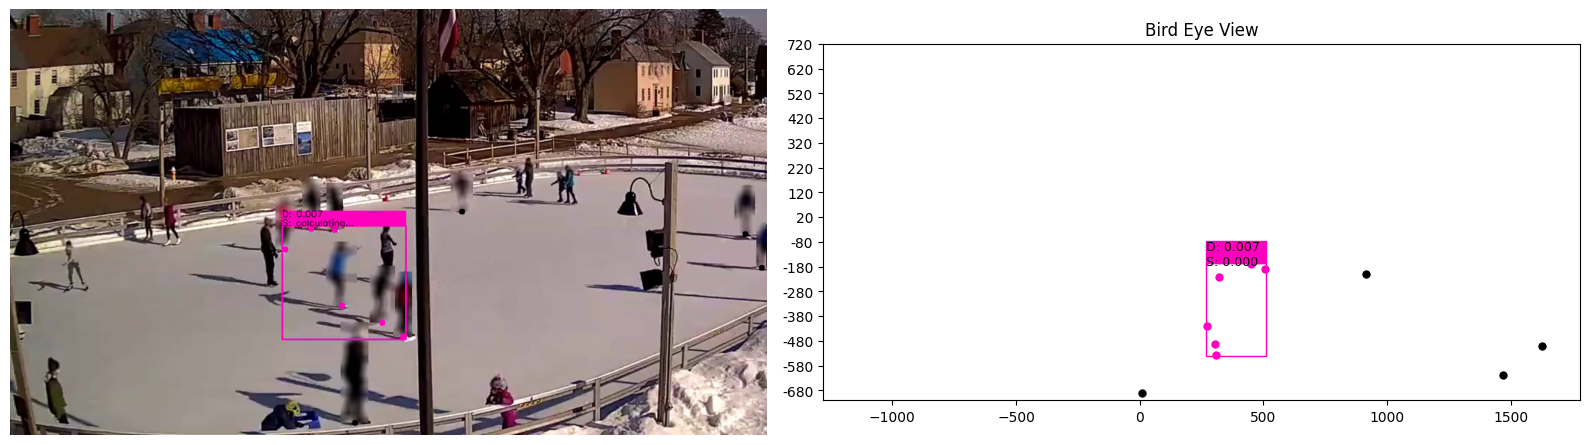


0: 384x640 13 persons, 237.3ms
Speed: 2.6ms preprocess, 237.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
(165.61084, 108.747925, 109.577576, 84.68439, 86.47327, 89.63464, 70.64249, 89.8288, 67.294556, 81.86694)


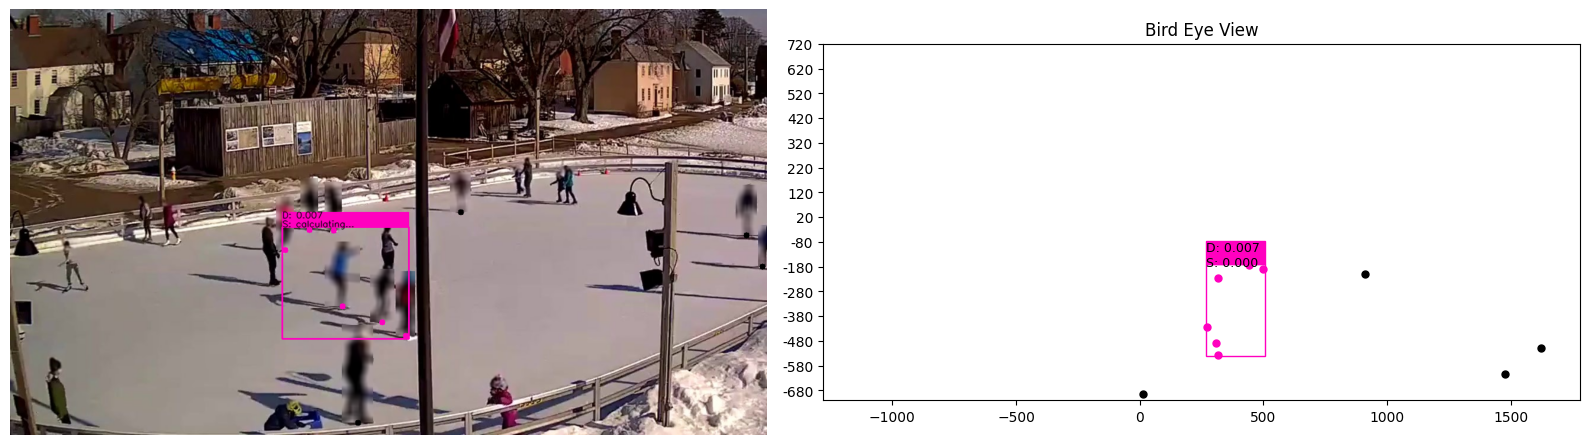


0: 384x640 13 persons, 222.9ms
Speed: 2.6ms preprocess, 222.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
(167.95667, 108.61224, 113.17047, 85.548004, 86.438324, 148.50903, 67.95688, 87.321106, 67.730774, 81.64114, 71.36557, 112.92749)


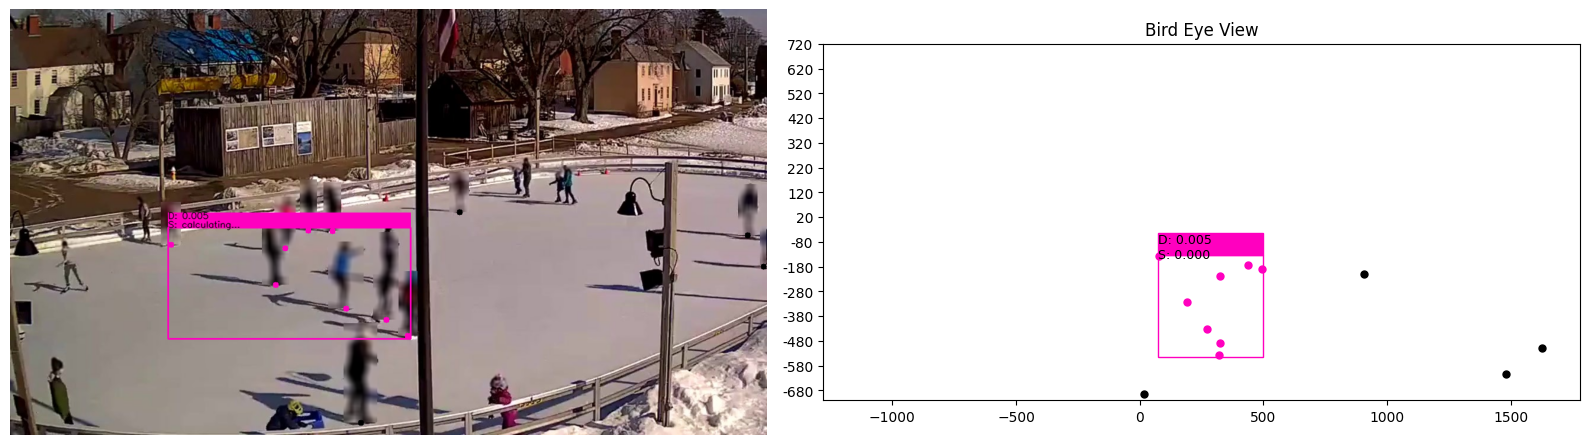


0: 384x640 13 persons, 240.2ms
Speed: 2.8ms preprocess, 240.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
(169.02844, 108.943054, 85.75055, 85.7793, 166.39987, 67.27075, 86.89325, 67.78131, 81.29343, 71.33386, 113.02243, 113.26807)


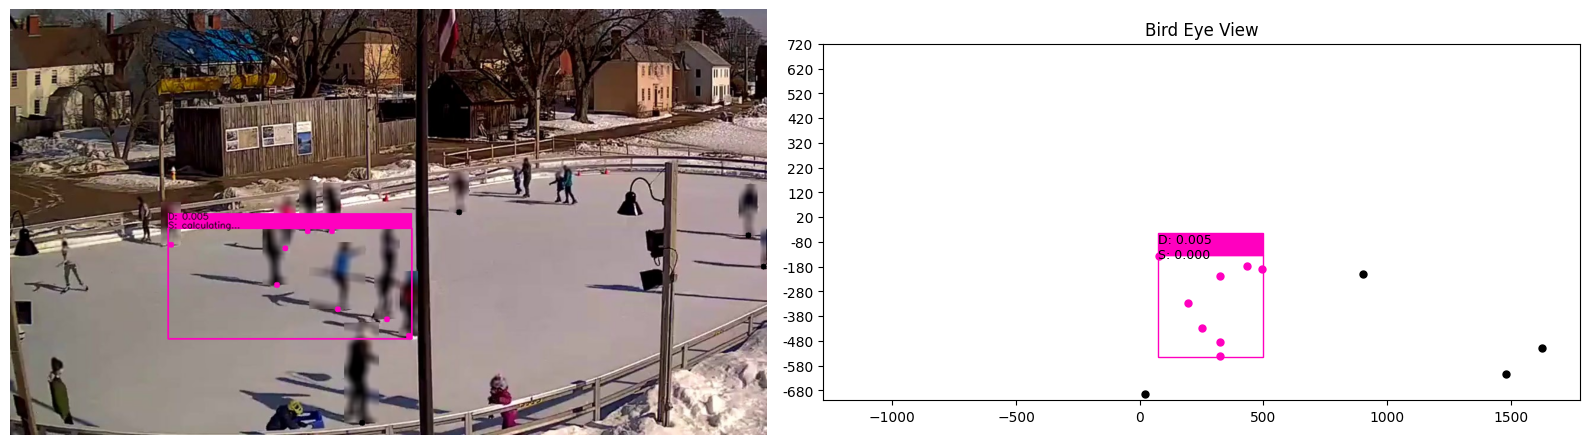


0: 384x640 12 persons, 252.2ms
Speed: 3.1ms preprocess, 252.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)
(171.3515, 108.97653, 87.04297, 81.132965, 173.80203, 81.885925, 67.0022, 82.36389, 73.37402, 113.83371, 113.37219)


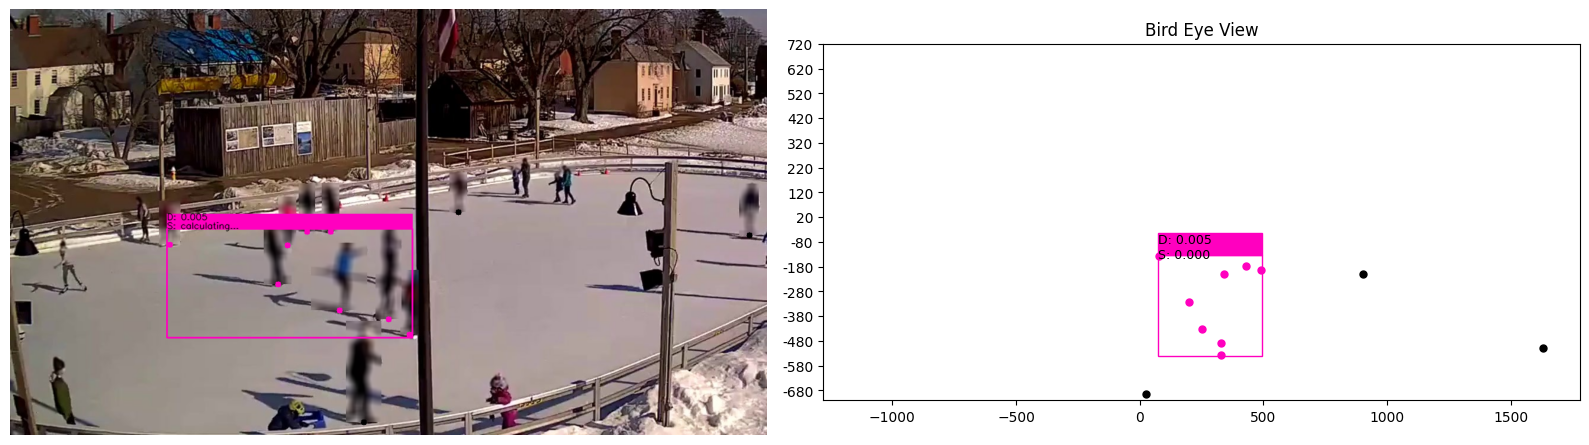


0: 384x640 12 persons, 257.0ms
Speed: 2.8ms preprocess, 257.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
(171.03778, 103.93744, 86.548096, 78.28186, 176.68622, 81.27881, 65.81671, 86.6261, 72.32724, 112.16681, 115.2771)


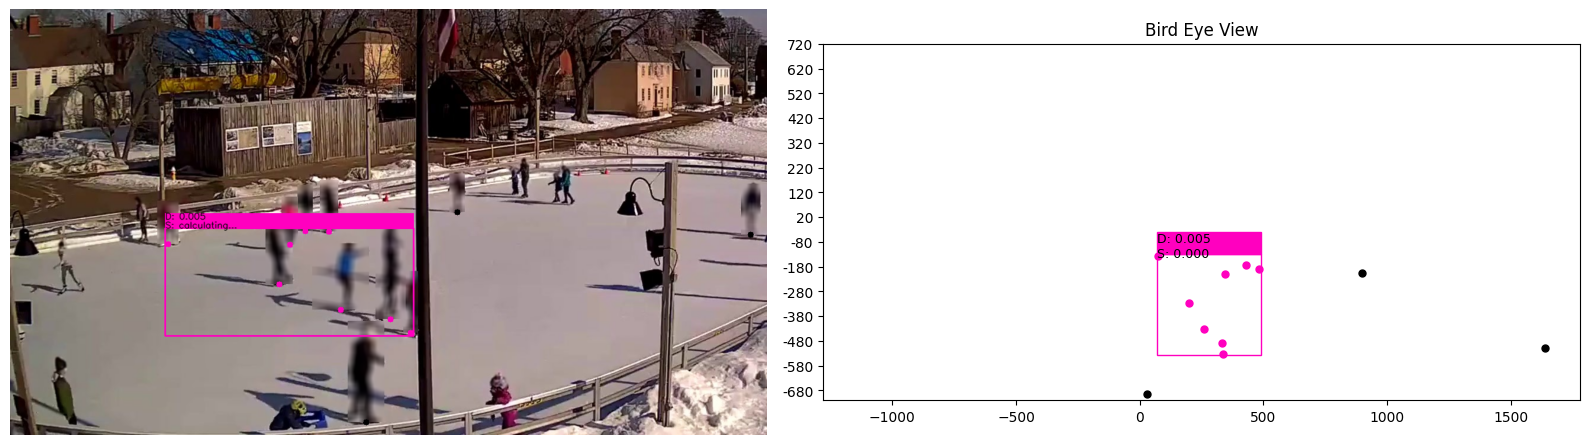


0: 384x640 11 persons, 287.8ms
Speed: 2.9ms preprocess, 287.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
(169.46454, 109.07953, 86.40454, 75.38959, 174.35703, 78.12683, 64.6947, 87.26343, 72.571655, 114.17905)


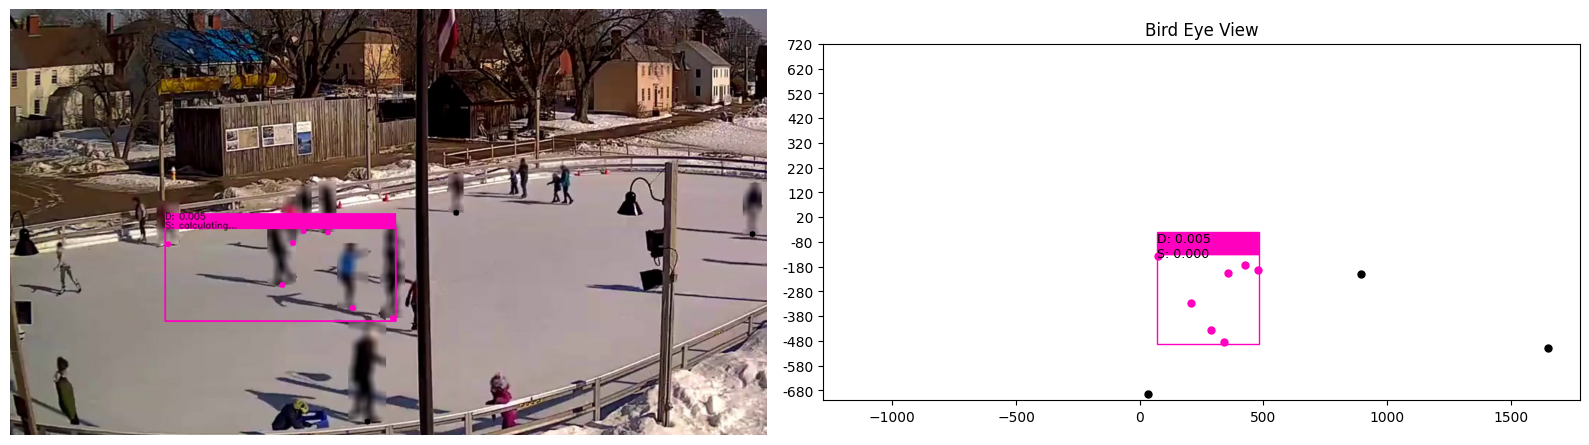


0: 384x640 12 persons, 228.6ms
Speed: 3.1ms preprocess, 228.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
(167.93646, 113.28192, 87.42526, 77.63898, 172.99908, 83.29965, 64.28516, 86.53174, 69.94513, 114.48355)


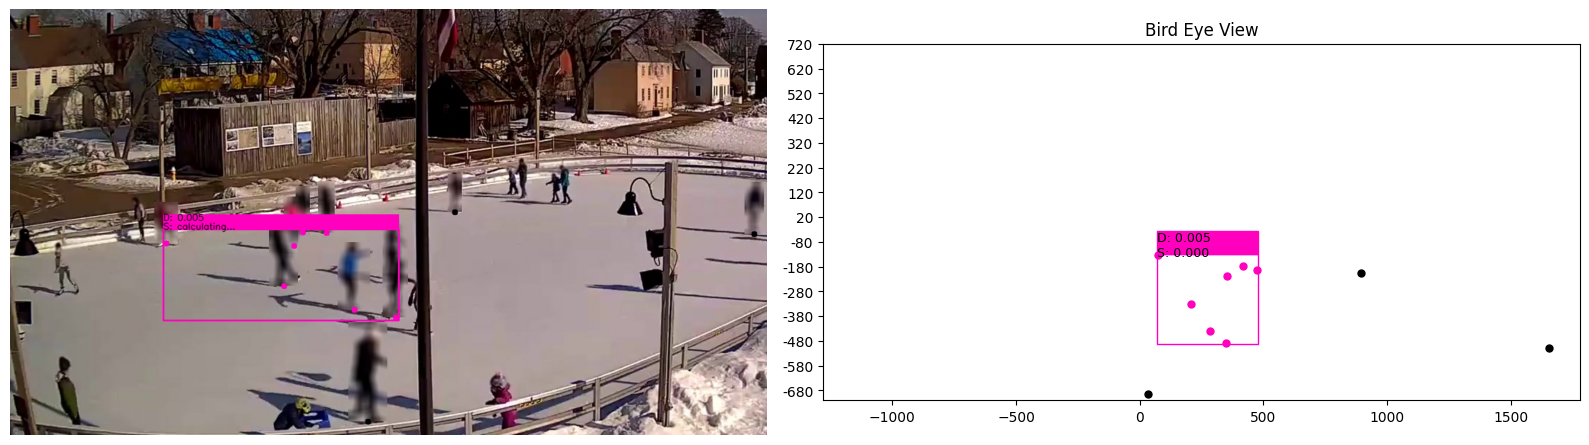

In [8]:
import torchvision
import torchvision.transforms as transforms
import math
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import supervision as sv
import os
import numpy as np
import pandas as pd
import csv

from pathlib import Path
from ultralytics import YOLO
from collections import defaultdict
from sklearn.cluster import DBSCAN

#calculate the scale factor for converting pixels to cm
def calculate_scale_factor(boxes_ref) :
  # Global average height of person: Women ~ 162 cm | Men ~ 175 cm (https://www.dryukselyurttas.com/post/average-height-men-and-women)
  # (162 + 175) / 2 = 168.5 cm
  global_average_height = (162 + 175) / 2

  # unzip the boundary box coordinates separated by xmin, ymin, width and height of the boxes
  _, _, width, height = zip(*boxes_ref)
  print(height)

  # average width and height of pixel dimensions
  W_avg = sum(width) / len(width)
  H_avg = sum(height) / len(height)

  # scale factor cm/pixels
  scale_factor = global_average_height / H_avg
  return scale_factor


# Function to transform points + get the bottom most point of the bounding boxes
def transform_points(boxes, matrix):
    bottom_points = []
    transformed_bottom_points = []
    for box in boxes:
        pnts = [int(box[0] + (box[2] * 0.5)), int(box[1] + box[3])]
        bottom_points.append(pnts)
        points = np.array([[pnts]], dtype="float32")
        trans_pnts = cv2.perspectiveTransform(points, matrix)[0][0]
        pnt = [int(trans_pnts[0]), int(trans_pnts[1])]
        transformed_bottom_points.append(pnt)
    return bottom_points, transformed_bottom_points

#draw a graph showing a bird's eye view of the selected region
def bird_eye_view(frame, label_df, df, color, scale_w, scale_h):
    h,w = frame.shape[0],frame.shape[1]
    blank_image = np.zeros((int(h), int(w), 3), np.uint8)
    white = (255, 255, 255)
    blank_image[:] = white

    for _, person in df.iterrows():
      x, y = person['transformed_bottom_points']
      center = (int(x),int(y))
      color = color_label_dict[person['labels']]
      color = [int(255 * c) for c in color[:3]]

      blank_image = cv2.circle(blank_image, center, 5, color=color, thickness=10)

    return blank_image


# Function to calculate distance
def calculate_distance(p1, p2, scale_factor):
    h = abs(p2[1] - p1[1])
    v = abs(p2[0] - p1[0])
    dist_v = float(v * scale_factor)
    dist_h = float(h * scale_factor)
    return int(np.sqrt((dist_h ** 2) + (dist_v ** 2)))

# Function to calculate distance between bottom points of people after converting to cm
def convert_distance_calculation(bottom_points, scale_factor):
    distance_matrix_dbscan = []
    for i in range(len(bottom_points)):
        row_distance = []
        for j in range(len(bottom_points)):
            if i != j:
                dist = calculate_distance(bottom_points[i], bottom_points[j], scale_factor)
                row_distance.append(dist)
            else:
                row_distance.append(0)
        distance_matrix_dbscan.append(row_distance)
    return distance_matrix_dbscan

# estimate the speed of the function
def speed_estimate(coords, latest_coord, frames_per_interval, fps, speeds):
    new_speeds = {}
    for track_id in coords:
        if track_id in latest_coord:
            sub_group = latest_coord[track_id][1]
            pos_curr = np.array(coords[track_id][0])
            pos_latest = np.array(latest_coord[track_id][0])

            # 2 seconds
            time_diff = frames_per_interval / fps
            displacement = np.linalg.norm(pos_latest - pos_curr)
            speed = displacement / time_diff
            new_speeds[track_id] = [speed, sub_group]

    print(f"newspeed : {new_speeds}")
    return latest_coord, new_speeds

# Get average speed of subgroups
def get_average_speed_subgroup(speeds):
    group_speeds = defaultdict(list)
    # Group speeds by subgroup
    for track_id, (speed, sub_group) in speeds.items():
        sub_group_key = int(sub_group)
        group_speeds[sub_group_key].append(speed)

    # Calculate average speed for each subgroup
    average_speeds = {}
    for sub_group, speeds_list in group_speeds.items():
        if speeds_list:
            average_speed = sum(speeds_list) / len(speeds_list)
        else:
            average_speed = 0
        # convert from cm/s^2 to m/s^2
        average_speed = average_speed / 100
        average_speeds[sub_group] = average_speed
    return average_speeds


# create points on the bottom points of the boundary boxes and color based on label:
def circle_crowd(frame, bboxes_untransformed, color_label_dict, circle_radius):
  for _, person in bboxes_untransformed.iterrows():
    x, y = person['untransformed_bottom_points']
    center = (int(x),int(y))
    color = color_label_dict[person['labels']]
    color = [int(255 * c) for c in color[:3]]

    frame = cv2.circle(frame,center,circle_radius,color=color, thickness=-1)
  return frame

#label the crowd density + draw boxes around subclusters of points
def label_crowd_density(frame, label_groups, color_label_dict,font_size, circle_radius):
  for label, group in label_groups.groupby('labels'):
    if label != -1:
      crowd_density = group['people_per_m2'].iloc[0]
      speed = group['speed_per_group'].iloc[0]
      text_speed = f"S: {speed:.3f}" if isinstance(speed, float) and not math.isnan(speed) else "S: calculating..."

      min_x, min_y, max_x, max_y = group['area_coord_untransformed'].iloc[0]
      min_x =  min_x - circle_radius
      min_y =  min_y - circle_radius
      max_x =  max_x + circle_radius
      max_y =  max_y + circle_radius

      points = np.array([[min_x, min_y], [max_x, min_y], [min_y, max_y], [max_x, max_y]], dtype=np.int32)

      # Reshape the points array to the required shape for cv2.polylines
      points = points.reshape((-1, 1, 2))
      color = color_label_dict[label]
      color = [int(255 * c) for c in color[:3]]

      #form boxes around the subclusters
      cv2.rectangle(frame, (min_x, min_y), (max_x, max_y), color=color, thickness=2)
      cv2.rectangle(frame, (min_x, min_y-25), (max_x, min_y), color=color, thickness=-1)

      # Add text on top of the rectangle
      text_density = f"D: {crowd_density:.3f}"
      cv2.putText(frame, text_density, (min_x, min_y - 15), cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0, 0, 0), thickness=1, lineType=cv2.LINE_AA)
      cv2.putText(frame, text_speed, (min_x, min_y), cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0, 0, 0), thickness=1, lineType=cv2.LINE_AA)
      # cv2.rectangle(frame, (int(min_x), int(min_y)), (int(min_x + t_size[0]), int(min_y + t_size[1])), (colors[label]), -1, cv2.LINE_AA)
  return frame

#VARIABLES:

#instantiate the yolo model for person detection
model = YOLO("yolov8n.pt")

#set class_id to zero to only get person boundary boxes
class_id = 0


frame_count = 10

# instantiate the tracker for tracking people
byte_tracker = sv.ByteTrack()  # Assuming byte_tracker is part of tracker initialization
byte_tracker.reset()

#variables for getting speed estimate:
#set to the video's fps
fps = 30

# number of seconds to do the speed calculation
interval_speed_calculation = 1
frames_per_interval = interval_speed_calculation * fps

#coords is the list of bbox coordinates of the current frame
coords = defaultdict(list)

#speeds is the speed of the labeled bbox
speeds = defaultdict(int)

#directory to the directory of frames
frames_dir = "/content/drive/MyDrive/data/sompt22/test/SOMPT22-03/img1/"

#annotator to blur bboxes identified
blur_annotator = sv.BlurAnnotator()

for i in range(1, frame_count):
    # get the image from the drive and read it as a cv2 image
    frame_filename = os.path.join(frames_dir, f"{i:06d}.jpg")
    frame = cv2.imread(frame_filename)

    if frame is None:
        print("Frame not found:", frame_filename)
        continue
    # resize if needed, but YOLO works best with original dimensions
    # frame = cv2.resize(frame, (800, 600))

    #turn the color of the object to rgb
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # YOLOV8: track the people and extract the bbox coordinates
    results = model.track(frame, persist=True, classes=[0], conf=0.08)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = byte_tracker.update_with_detections(detections)
    # prevent double detection with Non-Maximum Suppression (nms)
    detections = detections.with_nms(threshold=0.5, class_agnostic=False)

    bboxes, ids = [], []

    #for each tracked bbox, change the format of the bbox from min_x, min_y, max_x, max_y to min_x, min_y, width and height
    for track in detections:
        box = list(track[0])
        id = track[4]
        bboxes.append([box[0], box[1], box[2] - box[0], box[3] - box[1]])
        ids.append(id)

    #blur the output bboxes
    frame = blur_annotator.annotate(
      scene=frame.copy(),
      detections=detections
    )

    #calculate the scale factor with the average size of bboxes
    scale_factor = calculate_scale_factor(bboxes)

    H, W = frame.shape[:2]
    font_size = H/12

    img_params = np.float32([[W, 0], [W, H], [0, H], [0, 0]])
    #get perspective transformation matrix with the points
    matrix = cv2.getPerspectiveTransform(corner_points_arr, img_params)
    #transform the image with the transformation matrix
    img_transformed = cv2.warpPerspective(frame, matrix, (W, H))

    #get the bottom center points of each bbox untransformed and transformed
    bottom_points_untransformed, bottom_points_transformed = transform_points(bboxes, matrix)

    #change the distance from pixels to cm
    distance_matrix_dbscan = convert_distance_calculation(bottom_points_transformed, scale_factor)

    #Perform unsupervised learning to group subclusters of crowds using distance matrix
    #set eps to 500cm and minimum of 4 people in a group
    eps = 500
    min_samples = 4
    distance_matrix_dbscan = np.array(distance_matrix_dbscan)
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    clusters = db.fit_predict(distance_matrix_dbscan)

    #labels of subclusters where -1 is noise and any number >= 0 is a distinct subcluster
    labels = db.labels_

    bottom_points_transformed = np.array(bottom_points_transformed)

    #make a panda dataframe with the bbox coordinates, bottom points transformed and untransformed, distance matrix, labels
    df = pd.DataFrame(list(zip(bboxes, bottom_points_untransformed, bottom_points_transformed, distance_matrix_dbscan, labels)),
                      columns=['bboxes_untransformed', 'untransformed_bottom_points', 'transformed_bottom_points', 'distance_RL_cm', 'labels'])

    # get the area of the subclusters with min max x y values with untransformed and transformed to get area
    area_coord_untransformed = df.groupby('labels')['untransformed_bottom_points'].apply(lambda row: (min(p[0] for p in row), min(p[1] for p in row), max(p[0] for p in row), max(p[1] for p in row))).reset_index(name='area_coord_untransformed')
    area_coord_transformed = df.groupby('labels')['transformed_bottom_points'].apply(lambda row: (min(p[0] for p in row), min(p[1] for p in row), max(p[0] for p in row), max(p[1] for p in row))).reset_index(name='area_coord_transformed')
    area_df = df.groupby('labels')['transformed_bottom_points'].apply(lambda row: ((max(p[0] for p in row) - min(p[0] for p in row)) * (max(p[1] for p in row) - min(p[1] for p in row)))).reset_index(name='area_transformed')
    # get area in meters
    area_df['area_transformed'] = area_df['area_transformed'] / 100

    #get count of people in each group
    count_df = df.groupby('labels').size().reset_index(name='count')

    #create a label_df that contains the information of each group by merging by label
    label_df = pd.merge(area_df, count_df, on='labels')
    label_df = pd.merge(label_df, area_coord_untransformed, on='labels')
    label_df = pd.merge(label_df, area_coord_transformed, on='labels')

    #calcultate crowd density
    label_df['people_per_m2'] = label_df['count'] / label_df['area_transformed']

    #populate speed with previous speed of that group (updated every 2 seconds)
    label_df['speed_per_group'] = label_df['labels'].map(speeds)

    # for every two seconds, get a new speed calculation
    if i % frames_per_interval == 0:
        latest_coord = {}
        for id, point, label in zip(ids, bottom_points_transformed, labels):
            latest_coord[id] = (point, label)
        #if it is the second frame, populate with current coordinates of bboxes
        if not coords:
            coords = latest_coord
        else:
            # if not the second frame, estimate the speed
            coords, speeds = speed_estimate(coords, latest_coord, frames_per_interval, fps, speeds)
            speeds = get_average_speed_subgroup(speeds)
            label_df['speed_per_group'] = label_df['labels'].map(speeds)


    unique_labels = np.unique(labels)

    # color palette for coloring different subgroups
    colors = plt.cm.gist_rainbow(np.linspace(0, 1, len(unique_labels)))
    # color dictionary key: labels, value: colors
    color_label_dict = {}

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    circle_radius = 5

    # create the color dictionary for each label and plot each of the points on the graph
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # noise points are colored grey
        color_label_dict.update({k:col})
        class_member_mask = (labels == k)
        xy = bottom_points_transformed[class_member_mask]
        ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor=col, markersize=circle_radius)

    # for each subgroup, draw the area boxes
    for label, col in color_label_dict.items():
      if label != -1:
        row = label_df.loc[label_df['labels'] == label]
        coord_area = row['area_coord_transformed'].values[0]
        min_x, min_y, max_x, max_y = coord_area
        min_x =  min_x - circle_radius
        min_y =  min_y - circle_radius
        max_x =  max_x + circle_radius
        max_y =  max_y + circle_radius
        speed = row['speed_per_group'].values[0]
        density = row['people_per_m2'].values[0]
        fontsize = 9

        plt.text(min_x, min_y-(fontsize*10), f'D: {density:.3f}\nS: {speed:.3f}', fontsize=fontsize, color='black', va='top')
        rect = patches.Rectangle((min_x, min_y), (max_x - min_x), (max_y - min_y), edgecolor=col, facecolor='none')
        rect_label = patches.Rectangle((min_x, min_y-(fontsize*10)), (max_x - min_x), fontsize*10, edgecolor=col, facecolor=col)

        ax2.add_patch(rect)
        ax2.add_patch(rect_label)

            # Set equal aspect ratio
        ax2.set_aspect('equal')

        # Adjust x and y limits to fit the content
        ax2.set_xlim(-W, W+500)
        ax2.set_ylim(-H, H)

        # Invert y-axis to get a view similar to the original image
        ax2.invert_yaxis()
        ax2.set_yticks(range(-H, H, 100))
        ax2.set_yticklabels([-tick for tick in range(-H, H, 100)])

    ax2.set_title('Bird Eye View')

    # circle the people in the subgroups with their respective colors
    circled_crowd = circle_crowd(frame.copy(), df, color_label_dict, circle_radius)
    labeled_crowd_density = label_crowd_density(circled_crowd, label_df,color_label_dict,font_size, circle_radius)
    ax1.imshow(labeled_crowd_density)
    ax1.axis('off')


    # Concatenate the frame and the density map for side-by-side display
    plt.tight_layout()

    # Show the plots
    plt.show()

    #close the figure
    plt.close(fig)